In [11]:
# import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
import numpy as np

In [5]:
# import dataset
from tensorflow.keras.datasets import boston_housing

In [12]:
# load the data 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
# The Boston Housing dataset contains information about housing 
# prices in the Boston area. It includes features such as crime rate, 
# average number of rooms per dwelling, and more. 

In [13]:
# import libraries 
from sklearn.model_selection import train_test_split

In [15]:
# split the data into 80% training and 20% test 
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_targets, test_size=0.2, random_state=42)

In [16]:
# print the shapes of the resulting datasets. 
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Test targets shape: {y_test.shape}")

Training data shape: (323, 13)
Test data shape: (81, 13)
Training targets shape: (323,)
Test targets shape: (81,)


In [ ]:
# training data shape describes the number of samples (data points) and the number
# of features (variables) in the training dataset. 
# we have 323 houses and 13 features for each house in this dataset. 

In [ ]:
# test data shape 
# refers to the dimensions or structure of the dataset used for evaluating
# the performance of a machine learning model. 
# we have 81 samples (houses) and 13 features (variables) 
# the 13 features are represented as columns in a tabular dataset. 

In [17]:
# import 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# create a sequential model 
model = Sequential()

In [19]:
# add layers to the model 
model.add(Dense(units=64, activation='relu', input_shape=(13,))) # input layer
model.add(Dense(units=32, activation='relu')) # hidden layer
model.add(Dense(units=1)) # output layer

In [20]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [21]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# train the model using the training data 
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    verbose=1)

# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 12.9057 - mae: 2.5786 - val_loss: 21.7086 - val_mae: 3.8324
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 19.3624 - mae: 3.3063 - val_loss: 18.6597 - val_mae: 3.2757
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 17.3983 - mae: 3.1579 - val_loss: 14.6031 - val_mae: 3.0638
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 13.4617 - mae: 2.7604 - val_loss: 18.2780 - val_mae: 3.3157
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 15.2972 - mae: 2.9612 - val_loss: 14.8716 - val_mae: 2.8271
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 21.9864 - mae: 3.5248 - val_loss: 25.3654 - val_mae: 3.8419
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 21.2623 - mae: 3.3461 - val_loss: 19.0136 - val_mae: 3.5766
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 17.3741 

In [30]:
# print results 
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Test Loss: 20.6113
Test Mean Absolute Error (MAE): 3.3485


Epoch 1/100
9/9 [==============================] - 0s 25ms/step - loss: 10.0176 - mae: 2.3843 - val_loss: 11.9887 - val_mae: 2.6024
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 10.3789 - mae: 2.3760 - val_loss: 19.8994 - val_mae: 3.5033
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 10.4465 - mae: 2.5225 - val_loss: 13.2156 - val_mae: 2.7070
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 11.3228 - mae: 2.4350 - val_loss: 14.0779 - val_mae: 2.8388
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 12.3980 - mae: 2.5340 - val_loss: 22.7015 - val_mae: 3.7655
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 12.2519 - mae: 2.5779 - val_loss: 15.9977 - val_mae: 2.7834
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 10.3865 - mae: 2.3971 - val_loss: 26.5707 - val_mae: 3.9068
Epoch 8/100
9/9 [==============================] - 0s 16ms/step - loss: 10.5

TypeError: 'History' object is not callable

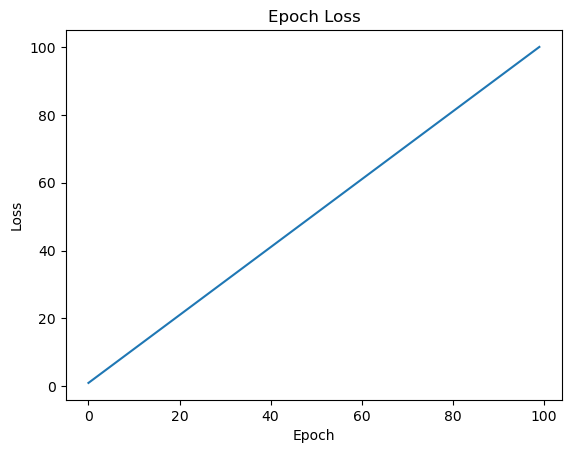

In [32]:
# graph 

hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

figure = plt.gcf()

plt.title('Epoch Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss'])+1)),
hist(['loss'])
plt.plot(range(1, len(hist.history['val_loss']+1))),
hist(['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show
